<a href="https://colab.research.google.com/github/preethimulupoju/-technical-coding-assignment/blob/main/ML_01_SUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cluster similar Houses**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

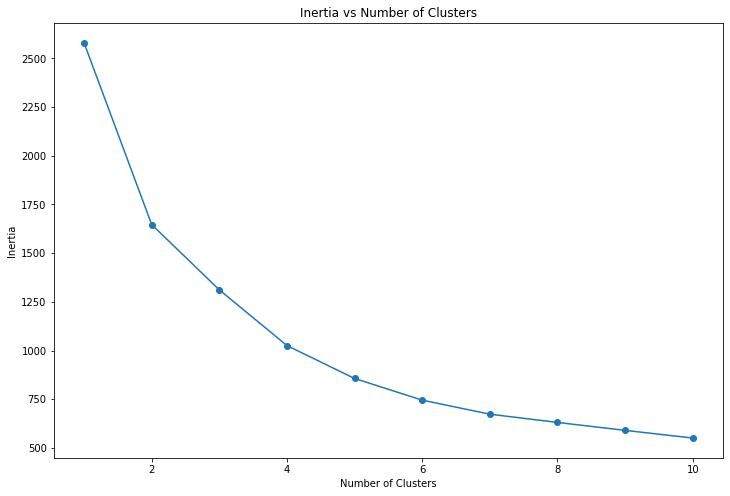

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Unnamed: 0      Sqft  Bedroom  Price  Cluster
0           1  1177.698        2  62000        2
1           2  2134.800        4  78000        2
2           3  1138.560        2  58000        2
3           4  1458.780        3  45000        2
4           5   967.776        3  45000        2


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

# Data cleaning & getting rid of irrelevant information before clustering
df.drop(['Floor', 'TotalFloor', 'Bathroom', 'Living.Room'], axis=1, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Finding the optimal value of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

# Train the model with the best value of k
k = 4  # based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Storing cluster to which the house belongs along with the data
df['Cluster'] = kmeans.labels_
print(df.head())
